<a href="https://colab.research.google.com/github/majidali321/EDA-Task/blob/main/Diabetes_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Total Num of Rows And Columns

In [4]:
df.shape

(768, 9)

### Check the Missing Values in Dataset

In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### What are the data types of each column?

In [11]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


## What are the mean, median, and standard deviation of the Glucose and BMI columns?

In [16]:
a = df[['Glucose','BMI']].mean()
b = df[['Glucose','BMI']].median()
c = df[['Glucose','BMI']].std()
print("\nMean of Glucose and BMI: ",a)
print("\nMedian of Glucose and BMI: ",b)
print("\nStandard deviation of Glucose and BMI: ",c)


Mean of Glucose and BMI:  Glucose    120.894531
BMI         31.992578
dtype: float64

Median of Glucose and BMI:  Glucose    117.0
BMI         32.0
dtype: float64

Standard deviation of Glucose and BMI:  Glucose    31.972618
BMI         7.884160
dtype: float64


### Plot a histogram of the Age column. What is the most common age group?

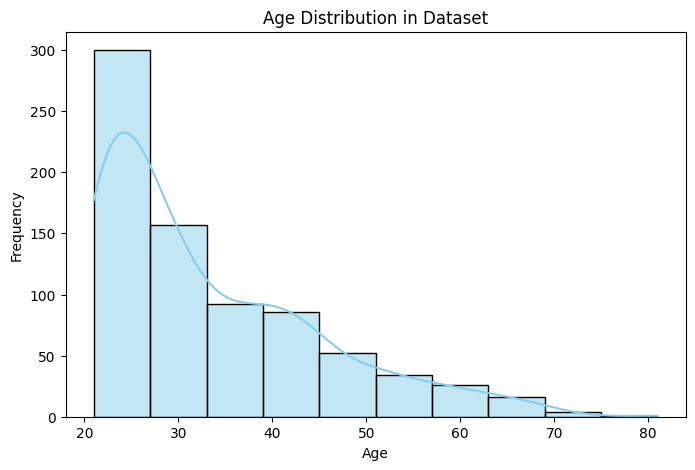

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution in Dataset")
plt.show()

### Which features are most strongly correlated with Outcome (Diabetes diagnosis)?

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


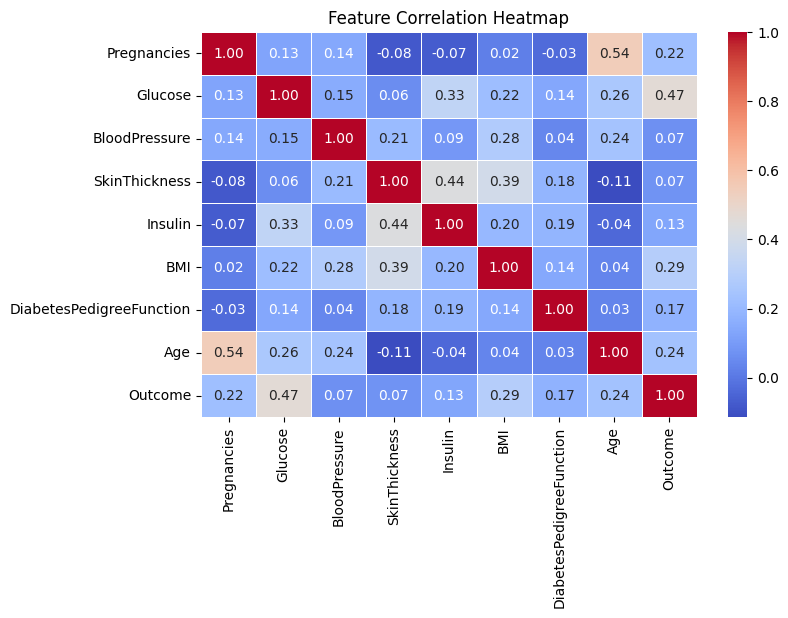

In [22]:
correlation = df.corr()['Outcome'].sort_values(ascending=False)
print(correlation)
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Use a boxplot to identify outliers in the Insulin column. Are there any extreme values?

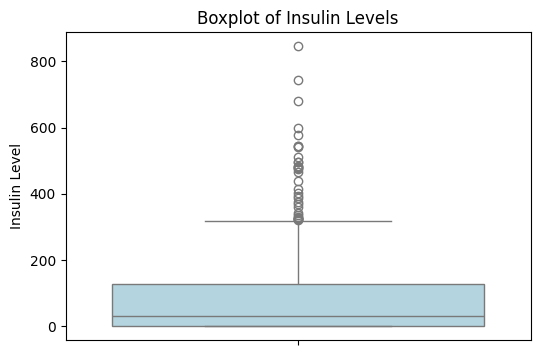

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Insulin'], color='lightblue')
plt.ylabel("Insulin Level")
plt.title("Boxplot of Insulin Levels")
plt.show()

Does higher BMI correlate with a higher chance of having diabetes? (Hint: Compare BMI distributions for diabetic and non-diabetic patients.)

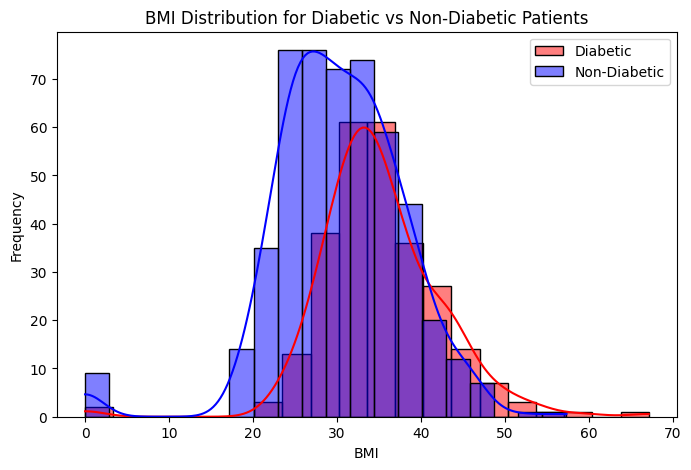

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['Outcome'] == 1]['BMI'], color='red', label='Diabetic', kde=True, bins=20)
sns.histplot(df[df['Outcome'] == 0]['BMI'], color='blue', label='Non-Diabetic', kde=True, bins=20)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("BMI Distribution for Diabetic vs Non-Diabetic Patients")
plt.legend()
plt.show()


. Comparison of Mean Values:
## ○ What is the average Glucose level for diabetic vs. non-diabetic patients?

In [26]:
mean_glucose_diabetic = df[df['Outcome'] == 1]['Glucose'].mean()
mean_glucose_non_diabetic = df[df['Outcome'] == 0]['Glucose'].mean()
print(f"Mean Glucose Level of Diabetic Patients: {mean_glucose_diabetic:.2f}")
print(f"Mean Glucose Level of Non-Diabetic Patients: {mean_glucose_non_diabetic:.2f}")


Mean Glucose Level of Diabetic Patients: 141.26
Mean Glucose Level of Non-Diabetic Patients: 109.98


Visualization:
## ● Create a pairplot to visualize relationships between features. What patterns do you observe

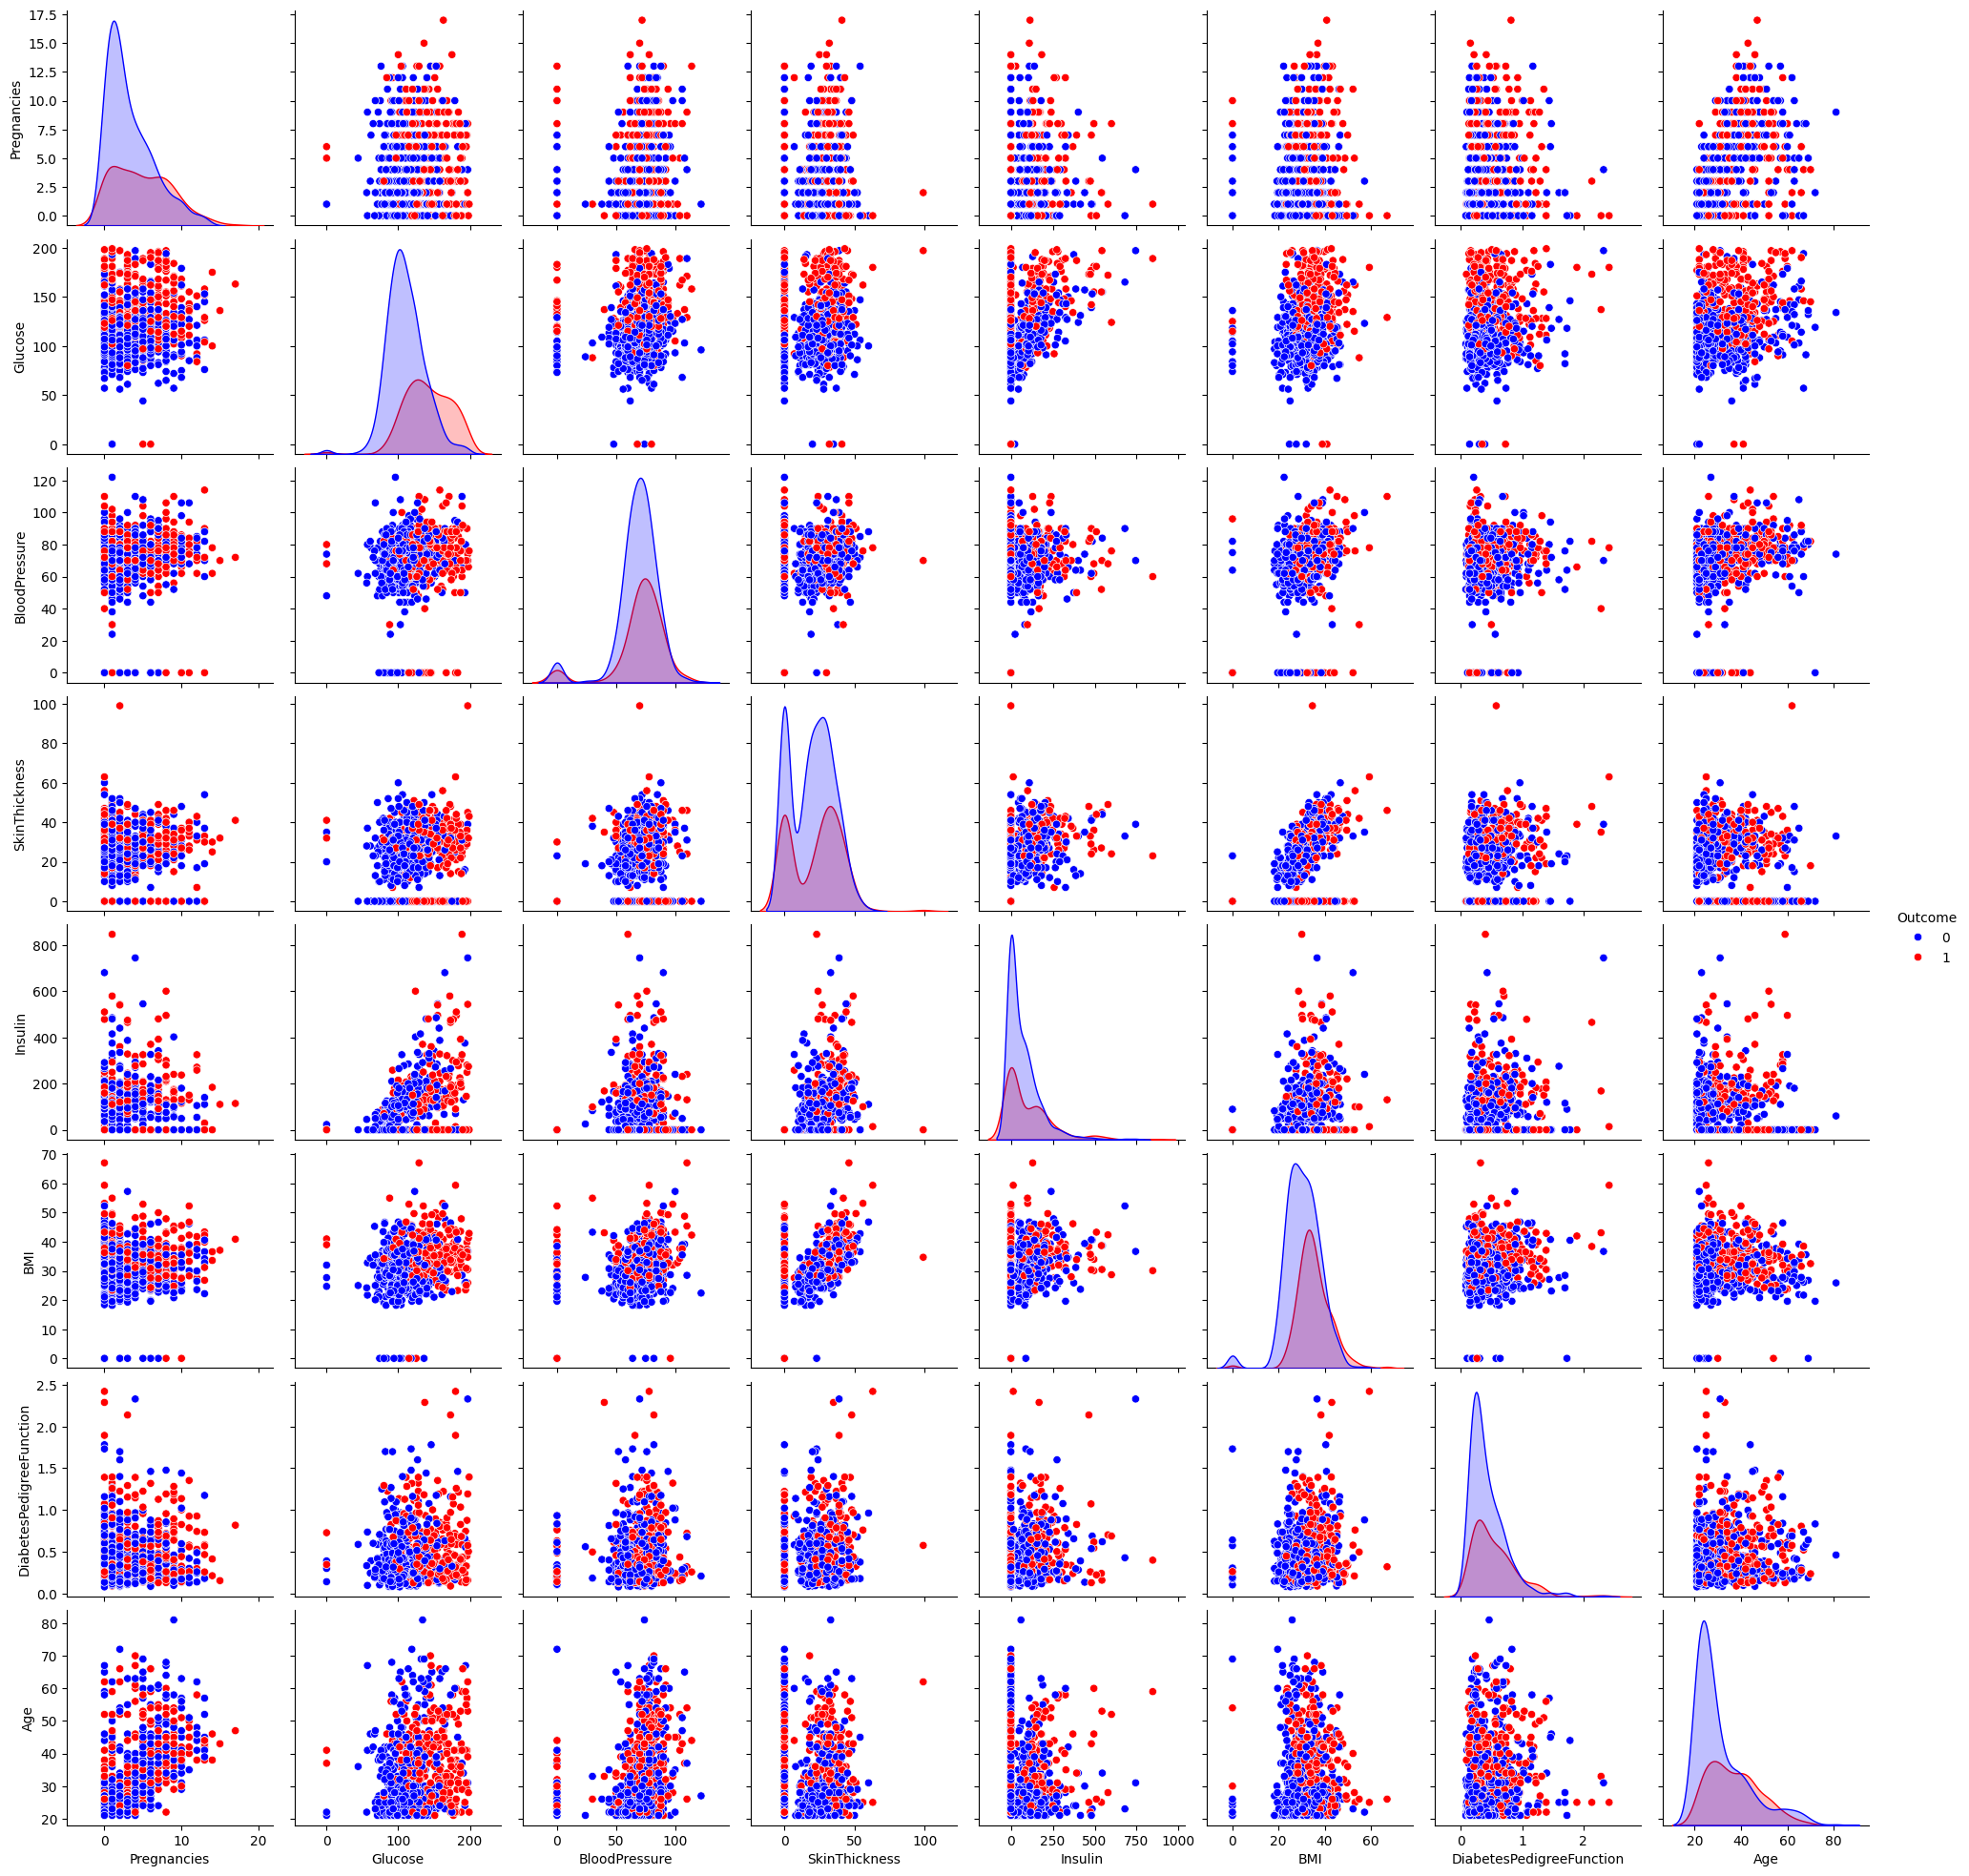

In [27]:
sns.pairplot(df, hue="Outcome", diag_kind="kde", palette={0: "blue", 1: "red"})
plt.show()

**Glucose & Diabetes**: Elevated glucose levels are closely associated with diabetes.

**BMI & Diabetes:** Individuals with diabetes tend to have a higher BMI.

**Age & Diabetes:**  The likelihood of diabetes increases with age.

**Insulin & Diabetes:** Insulin levels show significant variability and may not be a strong indicator.

**Pregnancies & Diabetes:** A higher number of pregnancies might slightly raise the risk of diabetes.

<ipython-input-31-c78d57d44454>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=strong_feature, data=df, palette=["blue", "red"])


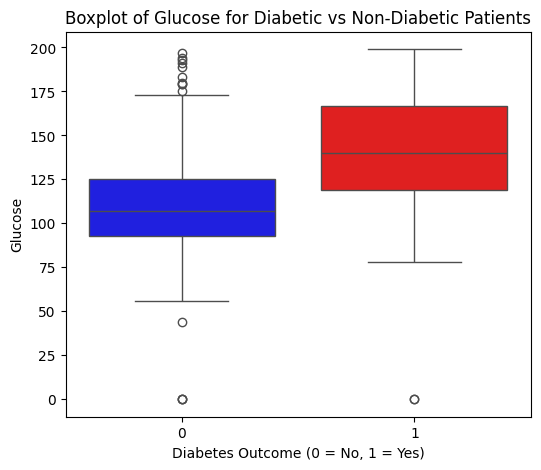

In [31]:

strong_feature = "Glucose"

# Boxplot without 'hue' (Fix: Direct palette usage)
plt.figure(figsize=(6, 5))
sns.boxplot(x="Outcome", y=strong_feature, data=df, palette=["blue", "red"])

# Labels and Title
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel(strong_feature)
plt.title(f"Boxplot of {strong_feature} for Diabetic vs Non-Diabetic Patients")

# Show plot
plt.show()

